In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_all = pd.read_csv("data/selected_projects.csv")
df_checks_statuses = pd.read_csv("data/graphql_checks_statuses.csv")

In [3]:
df_checks_statuses.columns

Index(['repo_name', 'last_commit_SHA', 'state', 'count', 'index', 'type',
       'check_name', 'check_status', 'check_conclusion', 'check_summary',
       'check_text', 'check_title', 'check_url', 'check_completedAt',
       'check_detailsUrl', 'check_steps_totalCount', 'check_suite_app_name',
       'check_suite_app_slug', 'check_suite_app_url',
       'check_suite_workflowRun_runNumber', 'check_suite_workflowRun_url',
       'check_suite_workflowRun_workflow_name', 'status_context',
       'status_description', 'status_state', 'status_target_url',
       'status_creator_login'],
      dtype='object')

In [4]:
df_checks_statuses.dtypes

repo_name                                 object
last_commit_SHA                           object
state                                     object
count                                      int64
index                                      int64
type                                      object
check_name                                object
check_status                              object
check_conclusion                          object
check_summary                             object
check_text                                object
check_title                               object
check_url                                 object
check_completedAt                         object
check_detailsUrl                          object
check_steps_totalCount                   float64
check_suite_app_name                      object
check_suite_app_slug                      object
check_suite_app_url                       object
check_suite_workflowRun_runNumber        float64
check_suite_workflow

In [5]:
df_checks_statuses.head()

,repo_name,last_commit_SHA,state,count,index,type,check_name,check_status,check_conclusion,check_summary,...,check_suite_app_slug,check_suite_app_url,check_suite_workflowRun_runNumber,check_suite_workflowRun_url,check_suite_workflowRun_workflow_name,status_context,status_description,status_state,status_target_url,status_creator_login
0,1c-syntax/bsl-language-server,e6da12a6eff3fdeeaa067475eeb9c941c182d449,SUCCESS,14,1,check,Benchmark,COMPLETED,SUCCESS,NaN,...,github-actions,https://help.github.com/en/actions,1904.0,https://github.com/1c-syntax/bsl-language-serv...,Benchmark,NaN,NaN,NaN,NaN,NaN
1,1c-syntax/bsl-language-server,e6da12a6eff3fdeeaa067475eeb9c941c182d449,SUCCESS,14,2,check,Analyse,COMPLETED,SUCCESS,NaN,...,github-actions,https://help.github.com/en/actions,1717.0,https://github.com/1c-syntax/bsl-language-serv...,CodeQL,NaN,NaN,NaN,NaN,NaN
2,1c-syntax/bsl-language-server,e6da12a6eff3fdeeaa067475eeb9c941c182d449,SUCCESS,14,3,check,build-deploy,COMPLETED,SUCCESS,NaN,...,github-actions,https://help.github.com/en/actions,549.0,https://github.com/1c-syntax/bsl-language-serv...,GitHub Pages,NaN,NaN,NaN,NaN,NaN
3,1c-syntax/bsl-language-server,e6da12a6eff3fdeeaa067475eeb9c941c182d449,SUCCESS,14,4,check,"build (11, ubuntu-latest)",COMPLETED,SUCCESS,NaN,...,github-actions,https://help.github.com/en/actions,6738.0,https://github.com/1c-syntax/bsl-language-serv...,Java CI,NaN,NaN,NaN,NaN,NaN
4,1c-syntax/bsl-language-server,e6da12a6eff3fdeeaa067475eeb9c941c182d449,SUCCESS,14,5,check,publish,COMPLETED,SUCCESS,NaN,...,github-actions,https://help.github.com/en/actions,73.0,https://github.com/1c-syntax/bsl-language-serv...,Publish to Sonatype,NaN,NaN,NaN,NaN,NaN


In [10]:
df_checks_statuses.shape

(8130, 27)

In [11]:
df_checks_statuses.groupby('repo_name').count()

,last_commit_SHA,state,count,index,type,check_name,check_status,check_conclusion,check_summary,check_text,...,check_suite_app_slug,check_suite_app_url,check_suite_workflowRun_runNumber,check_suite_workflowRun_url,check_suite_workflowRun_workflow_name,status_context,status_description,status_state,status_target_url,status_creator_login
repo_name,,,,,,,,,,,,,,,,,,,,,
1c-syntax/bsl-language-server,14,14,14,14,14,14,14,14,2,0,...,14,14,12,12,12,0,0,0,0,0
actiontech/dble,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,0
activiti/activiti,2,2,2,2,2,2,2,2,0,0,...,2,2,2,2,2,0,0,0,0,0
adempiere/adempiere,1,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,0,0,0,0,0
adobe-consulting-services/acs-aem-commons,14,14,14,14,14,12,12,12,1,0,...,12,12,12,12,12,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zendesk/maxwell,4,4,4,4,4,0,0,0,0,0,...,0,0,0,0,0,4,4,4,4,4
zerocracy/farm,2,2,2,2,2,2,2,2,2,0,...,2,2,2,2,2,0,0,0,0,0
zeromq/jeromq,9,9,9,9,9,1,1,1,1,0,...,1,1,0,0,0,8,8,8,8,8


Percentage of projects using Checks and Statuses:

In [12]:
df_checks_statuses.groupby('repo_name').count().shape[0] / df_all.shape[0]

0.7778541953232462

In [13]:
df_checks_statuses.groupby('repo_name').count().shape[0]

1131

Count of checks and statuses:

In [14]:
df_checks_statuses.type.value_counts()

check     6906
status    1224
Name: type, dtype: int64

Counts of projects using checks and statuses:

In [15]:
df_checks_statuses[df_checks_statuses['type'] == 'check'].groupby('repo_name').count().shape[0]

974

In [16]:
checks_repos = set(df_checks_statuses[df_checks_statuses['type'] == 'check'].repo_name.tolist())
status_repos = set(df_checks_statuses[df_checks_statuses['type'] == 'status'].repo_name.tolist())
both_repos = list(checks_repos.intersection(status_repos))
len(both_repos)

336

In [17]:
df_checks_statuses[df_checks_statuses['type'] == 'status'].groupby('repo_name').count().shape[0]

493

- Using Checks and Statuses: 336
- Only Checks: 638
- Only Statuses: 157

In [18]:
df_checks_statuses.check_suite_app_name.value_counts()

GitHub Actions                 5261
Azure Pipelines                 813
ci.jenkins.io                   256
Travis CI                        91
GitHub Pages                     89
SonarCloud                       83
GitHub Code Scanning             47
CircleCI Checks                  47
Cirrus CI                        35
deepsource.io                    10
Google Cloud Build                9
Terasology Jenkins.io             8
Codecov                           8
Confluent-Jenkins-CI              8
SonarSource-Next                  7
WhiteSource Bolt for GitHub       3
Dependabot                        3
GitGuardian                       3
WhiteSource for GitHub.com        2
Check Run Reporter                2
Community-TC Integration          1
Bitrise Checks                    1
Name: check_suite_app_name, dtype: int64

In [19]:
df_checks_statuses.status_creator_login.value_counts()[0:10]

codecov          148
asf-ci           102
github-pages      89
kokoro-team       27
jenkinsadmin      20
asf-ci-struts     19
spring-builds     18
grabl             17
ericvergnaud      16
brandonpage       13
Name: status_creator_login, dtype: int64

In [20]:
df_checks_statuses.status_context.value_counts()[0:10]

github/pages                                   89
codecov/patch                                  77
codecov/project                                76
continuous-integration/jenkins/branch          73
ci/circleci: build                             52
coverage/coveralls                             35
continuous-integration/appveyor/branch         32
continuous-integration/jenkins/incrementals    18
continuous-integration/travis-ci/push          17
License Compliance                             12
Name: status_context, dtype: int64

In [21]:
df_checks_statuses[df_checks_statuses['count'] == df_checks_statuses['count'].max()].check_name.value_counts()

java - digitaltwins - tests (Preview_LiveTest macOS1015_18_okhttp_surefiretest)             1
java - resourcemanager (Build Analyze)                                                      1
java - redisenterprise (Build generate_job_matrix)                                          1
java - quota (Build generate_job_matrix)                                                    1
java - videoanalyzer (Build Test ubuntu2004_111_surefiretest)                               1
                                                                                           ..
java - formrecognizer - tests-weekly (Public_LiveTest macOS1015_18_okhttp_surefiretest)     1
java - hybridcompute (Build Test windows2019_18_surefiretest)                               1
java - formrecognizer - tests-weekly (Public_LiveTest ubuntu2004_18_okhttp_surefiretest)    1
java - kusto (Build generate_job_matrix)                                                    1
java - servicebus - data (Build Test ubuntu2004_111_verify_a

In [22]:
both_repos

['broadinstitute/picard',
 'hyperledger/besu',
 'jenkinsci/warnings-ng-plugin',
 'authorjapps/zerocode',
 'thepranaygupta/data-structures-and-algorithms',
 'movingblocks/terasology',
 'spockframework/spock',
 'sofastack/sofa-tracer',
 'mybatis/mybatis-3',
 'rsksmart/rskj',
 'cloudnetservice/cloudnet-v3',
 'confluentinc/kafka-connect-hdfs',
 'eclipse/kura',
 'vividus-framework/vividus',
 'interestinglab/seatunnel',
 'grpc/grpc-java',
 'jbake-org/jbake',
 'jtablesaw/tablesaw',
 'palantir/conjure',
 'blusunrize/immersiveengineering',
 'forcedotcom/salesforcemobilesdk-android',
 'verapdf/verapdf-library',
 'inspectit/inspectit-ocelot',
 'netflix/genie',
 'zalando/problem',
 'googleapis/google-cloud-java',
 'twowaits/sde-interview-questions',
 'karatelabs/karate',
 'cyc2018/cs-notes',
 'scacap/spring-auto-restdocs',
 'natario1/cameraview',
 'mybatis/jpetstore-6',
 'radargun/radargun',
 'deepjavalibrary/djl',
 'ows-ali/hacktoberfest',
 'ctripcorp/apollo',
 'donnnno/arcticons',
 'metersphere/

In [23]:
df_checks_statuses[df_checks_statuses['repo_name'] == 'netflix/genie']

,repo_name,last_commit_SHA,state,count,index,type,check_name,check_status,check_conclusion,check_summary,...,check_suite_app_slug,check_suite_app_url,check_suite_workflowRun_runNumber,check_suite_workflowRun_url,check_suite_workflowRun_workflow_name,status_context,status_description,status_state,status_target_url,status_creator_login
5658,netflix/genie,219b7874b3849bd717bdcd291b67d99a74fa4bae,SUCCESS,2,1,check,Travis CI - Branch,COMPLETED,SUCCESS,<a href='https://app.travis-ci.com/github/Netf...,...,travis-ci,https://travis-ci.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5659,netflix/genie,219b7874b3849bd717bdcd291b67d99a74fa4bae,SUCCESS,2,2,status,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,coverage/coveralls,Coverage remained the same at 93.786%,SUCCESS,https://coveralls.io/builds/44032379,tgianos


## CI Usage - statuses

In [24]:
df_checks_statuses[df_checks_statuses['type'] == 'status'].repo_name.nunique()

493

In [25]:
def filter_ci(context, target_url, description):
    description = str(description)
    target_url = str(target_url)
    
    check_in_context = ['ci', 'continuous-integration', 'kokoro', 'bazel']
    check_in_target_url = ['ci.', 'screwdriver', 'buildkite', 'teamcity']
    check_in_description = ['teamcity', 'kokoro']
    
    for y in check_in_context:
        if y in context.lower():
            return True
        
    for y in check_in_target_url:
        if y in target_url.lower():
            return True
        
    for y in check_in_description:
        if y in description.lower():
            return True
        
    return False

In [26]:
df_statuses = df_checks_statuses[df_checks_statuses['type'] == 'status'].copy()

In [27]:

df_statuses[df_statuses.apply(lambda x: filter_ci(x.status_context, x.status_target_url, x.status_description), axis=1)].repo_name.nunique()


299

In [28]:

df_statuses[df_statuses.apply(lambda x: filter_ci(x.status_context, x.status_target_url, x.status_description), axis=1)].shape[0]


846

## Repos name using CI statuses

In [29]:
repos_name_using_statuses_ci = df_statuses[df_statuses.apply(lambda x: filter_ci(x.status_context, x.status_target_url, x.status_description), axis=1)].repo_name.tolist()

## CI Usage - Checks

In [30]:
df_checks_statuses[df_checks_statuses['type'] == 'check'].repo_name.nunique()

974

In [31]:
df_checks = df_checks_statuses[df_checks_statuses['type'] == 'check'].copy()

In [32]:
ci_apps = ['GitHub Actions', 'Azure Pipelines', 'ci.jenkins.io', 'ASF Cloudbees Jenkins ci-builds', 'Travis CI', 'CircleCI Checks', 'Cirrus CI', 'Confluent-Jenkins-CI']
df_checks[(df_checks['check_suite_app_name'].isin(ci_apps))].repo_name.nunique()

922

In [33]:
df_checks = df_checks.drop(columns=['status_context', 'status_description', 'status_state', 'status_target_url', 'status_creator_login'])

In [34]:
df_checks = df_checks.drop(columns=['check_steps_totalCount', 'count', 'index', 'check_suite_workflowRun_runNumber'])

In [35]:
df_checks.dtypes

repo_name                                object
last_commit_SHA                          object
state                                    object
type                                     object
check_name                               object
check_status                             object
check_conclusion                         object
check_summary                            object
check_text                               object
check_title                              object
check_url                                object
check_completedAt                        object
check_detailsUrl                         object
check_suite_app_name                     object
check_suite_app_slug                     object
check_suite_app_url                      object
check_suite_workflowRun_url              object
check_suite_workflowRun_workflow_name    object
dtype: object

In [36]:
df_checks['check_suite_app_name'] = df_checks['check_suite_app_name'].fillna('')

In [37]:
def check_substring(substring, string):
    if substring.lower() in string.lower():
        return True
    return False

df_checks_grouped = df_checks.groupby(by='repo_name').sum().reset_index()
filter = (df_checks_grouped['check_suite_app_name'].apply(lambda x: check_substring('GitHub Actions', x))) & (df_checks_grouped['check_name'].apply(lambda x: check_substring('build', x)))
# filter: projects using GA and have build with GA
include_repos = df_checks_grouped[filter].repo_name.tolist()


In [38]:
df_checks.check_suite_app_name.value_counts()

GitHub Actions                 5261
Azure Pipelines                 813
ci.jenkins.io                   256
                                119
Travis CI                        91
GitHub Pages                     89
SonarCloud                       83
GitHub Code Scanning             47
CircleCI Checks                  47
Cirrus CI                        35
deepsource.io                    10
Google Cloud Build                9
Terasology Jenkins.io             8
Confluent-Jenkins-CI              8
Codecov                           8
SonarSource-Next                  7
Dependabot                        3
WhiteSource Bolt for GitHub       3
GitGuardian                       3
WhiteSource for GitHub.com        2
Check Run Reporter                2
Bitrise Checks                    1
Community-TC Integration          1
Name: check_suite_app_name, dtype: int64

In [39]:
ci_apps_no_GA = ['Azure Pipelines', 'ci.jenkins.io', 'ASF Cloudbees Jenkins ci-builds', 'Travis CI', 'CircleCI Checks', 'Cirrus CI', 'Confluent-Jenkins-CI']
df_checks_ci_repos = df_checks[(df_checks['check_suite_app_name'].isin(ci_apps_no_GA)) | (df_checks['repo_name'].isin(include_repos))]


In [40]:
df_checks_ci_repos.repo_name.nunique()

712

## Repos name using CI checks

In [41]:
repos_name_using_checks_ci = df_checks_ci_repos.repo_name.tolist()

## Filter all CI status checks

In [42]:
len(set(repos_name_using_checks_ci))

712

In [43]:
len(set(repos_name_using_statuses_ci))

299

In [44]:
c1 = df_checks_statuses.repo_name.isin(repos_name_using_checks_ci)
c2 = df_checks_statuses.repo_name.isin(repos_name_using_statuses_ci)
ci_status_checks = df_checks_statuses[(c1) | (c2)]
ci_status_checks.repo_name.nunique()

912

In [45]:
df_checks_statuses[(c1) & (c2)].repo_name.nunique()

99

In [46]:
df_checks_statuses[(c1) & ~(c2)].repo_name.nunique()

613

In [47]:
df_checks_statuses[~(c1) & (c2)].repo_name.nunique()

200

In [48]:
df_checks_statuses[(c1) | (c2)].groupby('repo_name').first().state.value_counts()

SUCCESS    693
FAILURE    217
PENDING      2
Name: state, dtype: int64

Using CI

In [49]:
912 / 1454

0.6272352132049519

Using status checks

In [50]:
1131 / 1454

0.7778541953232462

In [51]:
freq_of_status_checks = ci_status_checks.groupby('repo_name').first()['count'].tolist()

In [54]:
print(np.median(freq_of_status_checks))
print(np.mean(freq_of_status_checks))

3.0
7.353070175438597


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


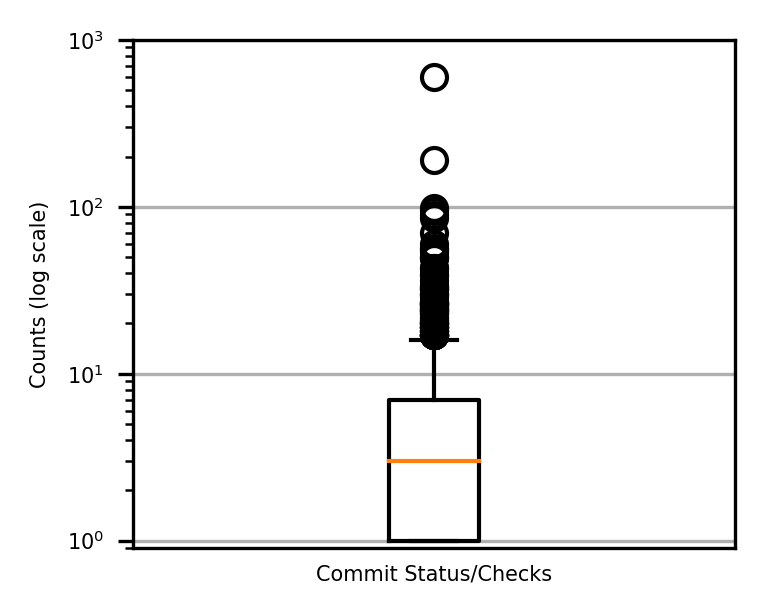

In [48]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 5}

plt.rc('font', **font)
plt.rcParams.update({'figure.figsize':(2.5,2), 'figure.dpi':300})
fig1, ax1 = plt.subplots(1,1,sharey=True)
ax1.set_xlabel('Commit Status/Checks')
ax1.set_ylabel('Counts (log scale)')
ax1.boxplot(freq_of_status_checks)
ax1.set_yscale('log')
ax1.set_xticks([0], ['Statuses'])

plt.grid(True)
# plt.xlim(40, 160)
plt.ylim(0.9, 1000)
plt.gcf().set_size_inches(2.5,2)
plt.tight_layout()
plt.savefig('ci-status-checks.pdf', dpi=300)

Look at some projects:

In [50]:
ci_status_checks.groupby(['repo_name', 'last_commit_SHA']).first().sort_values('count').tail(20)

,,state,count,index,type,check_name,check_status,check_conclusion,check_summary,check_text,check_title,...,check_suite_app_slug,check_suite_app_url,check_suite_workflowRun_runNumber,check_suite_workflowRun_url,check_suite_workflowRun_workflow_name,status_context,status_description,status_state,status_target_url,status_creator_login
repo_name,last_commit_SHA,,,,,,,,,,,,,,,,,,,,,
clickhouse/clickhouse-jdbc,272d9c48b1d72a7605953b6c94d760f2895afafb,FAILURE,36,1,check,Static code analysis,COMPLETED,SUCCESS,"There are 1 failures, 0 warnings, and 0 notices.",None,Build using JDK 17 against ClickHouse 21.3,...,github-actions,https://help.github.com/en/actions,202.0,https://github.com/ClickHouse/clickhouse-jdbc/...,Analysis,None,None,None,None,None
thelastpickle/cassandra-reaper,923f02e9f7668f9be2a8ab4e51f51b7de833f662,FAILURE,39,1,check,Build Reaper,COMPLETED,SUCCESS,"There are 1 failures, 0 warnings, and 0 notices.",None,"Each DC Availability (4.0.0, cassandra, each, ...",...,github-actions,https://help.github.com/en/actions,866.0,https://github.com/thelastpickle/cassandra-rea...,CI,codecov/patch,Coverage not affected when comparing 8f79e2d.....,SUCCESS,https://codecov.io/gh/thelastpickle/cassandra-...,codecov
ibotpeaches/apktool,d29411117e3b2da726cfd38ef418bd5b7a18ddb7,SUCCESS,39,1,check,analyze-mac-aapt (aapt_64),COMPLETED,SUCCESS,"There are 0 failures, 1 warnings, and 0 notices.",None,Analyze (java),...,github-actions,https://help.github.com/en/actions,71.0,https://github.com/iBotPeaches/Apktool/actions...,CI,None,None,None,None,None
jitsi/jitsi-meet-torture,68d7ad8995bd31dea7ad0bf5dd39d7c3e1decd91,SUCCESS,43,1,check,build,COMPLETED,SUCCESS,None,None,None,...,github-actions,https://help.github.com/en/actions,828.0,https://github.com/jitsi/jitsi-meet-torture/ac...,Java CI with Maven,None,None,None,None,None
quarkusio/quarkus,a8f65f85c77fdc103e4719edb62272e110e2c7b7,FAILURE,43,1,check,Attach pull request number,COMPLETED,NEUTRAL,"There are 1 failures, 1 warnings, and 0 notices.",None,JVM Tests - JDK 11,...,github-actions,https://help.github.com/en/actions,10223.0,https://github.com/quarkusio/quarkus/actions/r...,Quarkus CI,None,None,None,None,None
microsoft/applicationinsights-java,04dc9dbcaa91b705d95294108c31ef2bf5c838c2,SUCCESS,49,1,check,build (windows-latest),COMPLETED,SUCCESS,"There are 0 failures, 4 warnings, and 0 notices.",[**Tests**](https://github-private.visualstudi...,build (windows-latest),...,github-actions,https://help.github.com/en/actions,134.0,https://github.com/microsoft/ApplicationInsigh...,CI build,None,None,None,None,None
datadog/dd-trace-java,0a3814364cf8c62c8030277ec81b329b33b47e73,FAILURE,50,1,check,Analyze (java),COMPLETED,SUCCESS,* [build](https://circleci.com/gh/DataDog/dd-t...,None,Workflow: build_test,...,github-actions,https://help.github.com/en/actions,460.0,https://github.com/DataDog/dd-trace-java/actio...,CodeQL,ci/circleci: test_8_inst_latest,Your tests failed on CircleCI,FAILURE,https://circleci.com/gh/DataDog/dd-trace-java/...,fermayo
junit-pioneer/junit-pioneer,5bac897f2057d5ca4180dd9486fb52911b3ea9fe,FAILURE,50,1,check,Gradle wrapper validation,COMPLETED,SUCCESS,"There are 0 failures, 2 warnings, and 0 notices.",None,with Java 8 on windows,...,github-actions,https://help.github.com/en/actions,112.0,https://github.com/junit-pioneer/junit-pioneer...,Main build,None,None,None,None,None
apache/beam,79496b2ff9f65c4584fa1a7a8e9630ffd6d16222,SUCCESS,53,1,check,Check GCP variables,COMPLETED,SUCCESS,"There are 4 failures, 0 warnings, and 0 notices.",None,"Python Unit Tests (ubuntu-latest, 3.7, py37)",...,github-actions,https://help.github.com/en/actions,9440.0,https://github.com/apache/beam/actions/runs/14...,Build python source distribution and wheels,codecov/patch,Coverage not affected when comparing c04a2a8.....,SUCCESS,https://codecov.io/gh/apache/beam/commit/79496...,codecov


## Filter builds

In [192]:
ci_status_checks.columns

Index(['repo_name', 'last_commit_SHA', 'state', 'count', 'index', 'type',
       'check_name', 'check_status', 'check_conclusion', 'check_summary',
       'check_text', 'check_title', 'check_url', 'check_completedAt',
       'check_detailsUrl', 'check_steps_totalCount', 'check_suite_app_name',
       'check_suite_app_slug', 'check_suite_app_url',
       'check_suite_workflowRun_runNumber', 'check_suite_workflowRun_url',
       'check_suite_workflowRun_workflow_name', 'status_context',
       'status_description', 'status_state', 'status_target_url',
       'status_creator_login'],
      dtype='object')

In [193]:
df_build_checks = ci_status_checks[ci_status_checks['check_name'].str.contains("build", case=False) |
   ci_status_checks['check_title'].str.contains("build", case=False) |
   ci_status_checks['check_title'].str.contains("built", case=False) | 
   ci_status_checks['check_text'].str.contains("build", case=False) | 
   ci_status_checks['status_context'].str.contains("build", case=False) | 
   ci_status_checks['status_description'].str.contains("build", case=False) | 
   ci_status_checks['status_description'].str.contains("built", case=False)].copy()

In [195]:
df_build_checks.head()

,repo_name,last_commit_SHA,state,count,index,type,check_name,check_status,check_conclusion,check_summary,...,check_suite_app_slug,check_suite_app_url,check_suite_workflowRun_runNumber,check_suite_workflowRun_url,check_suite_workflowRun_workflow_name,status_context,status_description,status_state,status_target_url,status_creator_login
2,1c-syntax/bsl-language-server,e6da12a6eff3fdeeaa067475eeb9c941c182d449,SUCCESS,14,3,check,build-deploy,COMPLETED,SUCCESS,NaN,...,github-actions,https://help.github.com/en/actions,549.0,https://github.com/1c-syntax/bsl-language-serv...,GitHub Pages,NaN,NaN,NaN,NaN,NaN
3,1c-syntax/bsl-language-server,e6da12a6eff3fdeeaa067475eeb9c941c182d449,SUCCESS,14,4,check,"build (11, ubuntu-latest)",COMPLETED,SUCCESS,NaN,...,github-actions,https://help.github.com/en/actions,6738.0,https://github.com/1c-syntax/bsl-language-serv...,Java CI,NaN,NaN,NaN,NaN,NaN
6,1c-syntax/bsl-language-server,e6da12a6eff3fdeeaa067475eeb9c941c182d449,SUCCESS,14,7,check,build,COMPLETED,SUCCESS,NaN,...,github-actions,https://help.github.com/en/actions,2944.0,https://github.com/1c-syntax/bsl-language-serv...,javadoc,NaN,NaN,NaN,NaN,NaN
7,1c-syntax/bsl-language-server,e6da12a6eff3fdeeaa067475eeb9c941c182d449,SUCCESS,14,8,check,"build (11, windows-latest)",COMPLETED,SUCCESS,NaN,...,github-actions,https://help.github.com/en/actions,6738.0,https://github.com/1c-syntax/bsl-language-serv...,Java CI,NaN,NaN,NaN,NaN,NaN
8,1c-syntax/bsl-language-server,e6da12a6eff3fdeeaa067475eeb9c941c182d449,SUCCESS,14,9,check,"build (11, macOS-latest)",COMPLETED,SUCCESS,NaN,...,github-actions,https://help.github.com/en/actions,6738.0,https://github.com/1c-syntax/bsl-language-serv...,Java CI,NaN,NaN,NaN,NaN,NaN


In [265]:
df_build_checks.shape

(2846, 27)

In [196]:
df_build_checks_counts = df_build_checks.groupby(by='repo_name').count().reset_index()[['repo_name','last_commit_SHA']]
df_build_checks_counts.head()

,repo_name,last_commit_SHA
0,1c-syntax/bsl-language-server,8
1,actiontech/dble,1
2,activiti/activiti,1
3,adobe-consulting-services/acs-aem-commons,6
4,adobe/aem-core-wcm-components,4


In [197]:
df_build_checks_counts.shape[0]

843

In [198]:
df_results = pd.read_csv('data/combined_results.csv')
df_results['ci_usage_new'] = 0
df_results.loc[df_results['repo_name'].isin(ci_status_checks.repo_name.tolist()), 'ci_usage_new'] = 1

In [199]:
df_results.head()

,repo_name,testing,sat_usage,ci_state,reviews,comments,ci_usage_new,cr_reviews,cr_comments,testing_coverage,cr_review_comments,cr_changed_files,cr_changed_lines,ci_build_count,ci_build_statuses,ci_build_checks,ci_build_combined
0,1c-syntax/bsl-language-server,NaN,0,0.0,High,Moderate,1,64.0,36.0,NaN,72.0,752.0,40997.0,8.0,NaN,1.0,1.0
1,abhpd/hacktoberfest2021,NaN,0,NaN,Low,Low,0,14.0,14.0,NaN,0.0,52.0,7629.0,NaN,NaN,NaN,NaN
2,actiontech/dble,Very Low,1,1.0,Low,Low,1,17.0,1.0,8.02,0.0,58.0,1513.0,1.0,NaN,1.0,1.0
3,activiti/activiti,NaN,1,1.0,Low,Low,1,31.0,13.0,NaN,17.0,70.0,2696.0,1.0,NaN,1.0,1.0
4,adeekshith/watomatic,NaN,0,NaN,Low,Low,0,16.0,11.0,NaN,0.0,88.0,2392.0,NaN,NaN,NaN,NaN


In [200]:
df_results['ci_usage_new'] = df_results['ci_usage_new'].fillna(0)

In [201]:
for index, row in df_build_checks_counts.iterrows():
    df_results.loc[df_results['repo_name'] == row['repo_name'], 'ci_build_count'] = row['last_commit_SHA']

In [202]:
df_results.to_csv('data/combined_results.csv', index=False)

In [207]:
df_build_checks_counts['rollup_result'] = 1

In [206]:
df_build_checks.repo_name.nunique()

843

In [210]:
for index, row in df_build_checks_counts.iterrows():
    for index2, row2 in df_build_checks[df_build_checks['repo_name'] == row['repo_name']].iterrows():
        if row2['check_conclusion'] != 'SUCCESS':
            if row2['status_state'] != 'SUCCESS':
                df_build_checks_counts.loc[index, 'rollup_result'] = 0
   

In [211]:
df_build_checks_counts

,repo_name,last_commit_SHA,rollup_result
0,1c-syntax/bsl-language-server,8,1
1,actiontech/dble,1,1
2,activiti/activiti,1,1
3,adobe-consulting-services/acs-aem-commons,6,1
4,adobe/aem-core-wcm-components,4,1
...,...,...,...
838,zendesk/maxwell,1,1
839,zerocracy/farm,2,0
840,zeromq/jeromq,1,1
841,zkoss/zk,1,1


In [212]:
df_build_checks_counts.rollup_result.value_counts()

1    704
0    139
Name: rollup_result, dtype: int64

In [213]:
704 / 843

0.8351126927639383

In [217]:
ci_combined = ci_status_checks.groupby('repo_name').first().reset_index()[['repo_name','state']]
ci_combined.head()

,repo_name,state
0,1c-syntax/bsl-language-server,SUCCESS
1,actiontech/dble,SUCCESS
2,activiti/activiti,SUCCESS
3,adobe-consulting-services/acs-aem-commons,SUCCESS
4,adobe/aem-core-wcm-components,SUCCESS


In [218]:
ci_combined['state'] = ci_combined['state'].apply(lambda x: 1 if x == 'SUCCESS' else 0)

In [220]:
ci_combined.state.value_counts()

1    693
0    219
Name: state, dtype: int64

In [221]:
693 / 912

0.7598684210526315

In [222]:
final_df = pd.read_csv('data/combined_results.csv')
final_df.head()

,repo_name,testing,sat_usage,ci_state,reviews,comments,ci_usage_new,cr_reviews,cr_comments,testing_coverage,cr_review_comments,cr_changed_files,cr_changed_lines,ci_build_count,ci_build_statuses,ci_build_checks,ci_build_combined
0,1c-syntax/bsl-language-server,NaN,0,0.0,High,Moderate,1,64.0,36.0,NaN,72.0,752.0,40997.0,8.0,NaN,1.0,1.0
1,abhpd/hacktoberfest2021,NaN,0,NaN,Low,Low,0,14.0,14.0,NaN,0.0,52.0,7629.0,NaN,NaN,NaN,NaN
2,actiontech/dble,Very Low,1,1.0,Low,Low,1,17.0,1.0,8.02,0.0,58.0,1513.0,1.0,NaN,1.0,1.0
3,activiti/activiti,NaN,1,1.0,Low,Low,1,31.0,13.0,NaN,17.0,70.0,2696.0,1.0,NaN,1.0,1.0
4,adeekshith/watomatic,NaN,0,NaN,Low,Low,0,16.0,11.0,NaN,0.0,88.0,2392.0,NaN,NaN,NaN,NaN


In [224]:
final_df = final_df.drop(columns=['ci_build_statuses', 'ci_build_checks'])
final_df.head()

,repo_name,testing,sat_usage,ci_state,reviews,comments,ci_usage_new,cr_reviews,cr_comments,testing_coverage,cr_review_comments,cr_changed_files,cr_changed_lines,ci_build_count,ci_build_combined
0,1c-syntax/bsl-language-server,NaN,0,0.0,High,Moderate,1,64.0,36.0,NaN,72.0,752.0,40997.0,8.0,1.0
1,abhpd/hacktoberfest2021,NaN,0,NaN,Low,Low,0,14.0,14.0,NaN,0.0,52.0,7629.0,NaN,NaN
2,actiontech/dble,Very Low,1,1.0,Low,Low,1,17.0,1.0,8.02,0.0,58.0,1513.0,1.0,1.0
3,activiti/activiti,NaN,1,1.0,Low,Low,1,31.0,13.0,NaN,17.0,70.0,2696.0,1.0,1.0
4,adeekshith/watomatic,NaN,0,NaN,Low,Low,0,16.0,11.0,NaN,0.0,88.0,2392.0,NaN,NaN


In [225]:
df_build_checks_counts

,repo_name,last_commit_SHA,rollup_result
0,1c-syntax/bsl-language-server,8,1
1,actiontech/dble,1,1
2,activiti/activiti,1,1
3,adobe-consulting-services/acs-aem-commons,6,1
4,adobe/aem-core-wcm-components,4,1
...,...,...,...
838,zendesk/maxwell,1,1
839,zerocracy/farm,2,0
840,zeromq/jeromq,1,1
841,zkoss/zk,1,1


In [235]:
final_df['ci_build_combined'] = np.nan
for index, row in df_build_checks_counts.iterrows():
    final_df.loc[final_df['repo_name'] == row['repo_name'], 'ci_build_combined'] = row['rollup_result']

In [236]:
final_df['ci_build_combined'].value_counts()

1.0    704
0.0    139
Name: ci_build_combined, dtype: int64

In [237]:
final_df['ci_state'] = np.nan
for index, row in ci_combined.iterrows():
    final_df.loc[final_df['repo_name'] == row['repo_name'], 'ci_state'] = row['state']

In [238]:
final_df['ci_state'].value_counts()

1.0    693
0.0    219
Name: ci_state, dtype: int64

In [263]:
final_df['ci_usage_new'] = 0
final_df.loc[final_df['repo_name'].isin(ci_combined.repo_name), 'ci_usage_new'] = 1

In [264]:
final_df.to_csv('data/combined_results.csv', index=False)